# Density Estimation for a mixture of Gaussians

Adapted from http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html

Plot the density estimation of a mixture of two Gaussians. Data is generated from two Gaussians with different centers and covariance matrices.

In [6]:
using PyPlot, PyCall
using ScikitLearn
using ScikitLearn.Utils: meshgrid

@pyimport matplotlib.colors as mpl_colors

@sk_import mixture: GMM

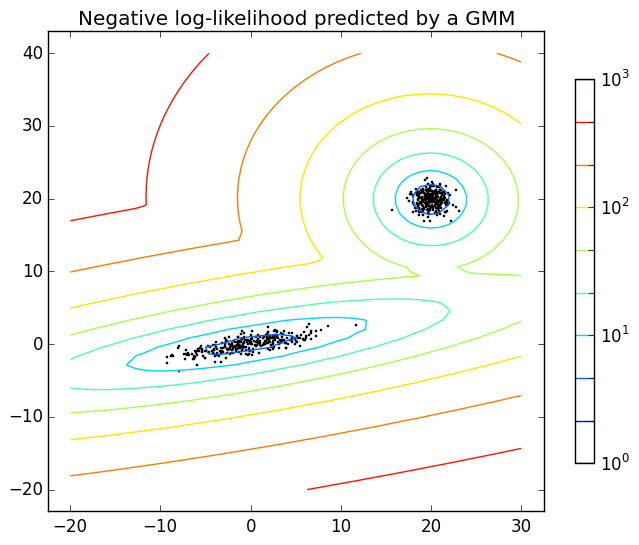

In [7]:
n_samples = 300

# generate random sample, two components
srand(42)

# generate spherical data centered on (20, 20)
shifted_gaussian = randn(n_samples, 2) .+ [20, 20]'

# generate zero centered stretched Gaussian data
C = [0. -0.7
     3.5 .7]
stretched_gaussian = randn(n_samples, 2) * C

# concatenate the two datasets into the final training set
X_train = vcat(shifted_gaussian, stretched_gaussian)

# fit a Gaussian Mixture Model with two components
clf = GMM(n_components=2, covariance_type="full")
fit!(clf, X_train)

# display predicted scores by the model as a contour plot
x = linspace(-20.0, 30.0)
y = linspace(-20.0, 40.0)
X, Y = meshgrid(x, y)
XX = hcat(X[:], Y[:])
Z = -score_samples(clf, XX)[1]

Z = reshape(Z, size(X))

CS = contour(X, Y, Z, norm=mpl_colors.LogNorm(vmin=1.0, vmax=1000.0),
             levels=logspace(0, 3, 10))
CB = colorbar(CS, shrink=0.8, extend="both")
scatter(X_train[:, 1], X_train[:, 2], .8)

title("Negative log-likelihood predicted by a GMM")
axis("tight");